In [1]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Score'
    },
    inplace=True)

In [4]:
X=df[['Age','Income','Score']]

In [5]:
dendro=ff.create_dendrogram(X)
dendro.update_layout({'width':1000,'height':800})
dendro.show()

In [9]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

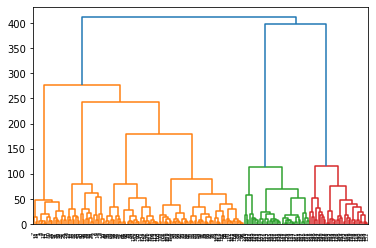

In [10]:
sch.dendrogram(sch.linkage(X,"ward"))
plt.show()

In [11]:
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
scaled_data = StandardScaler().fit_transform(df)

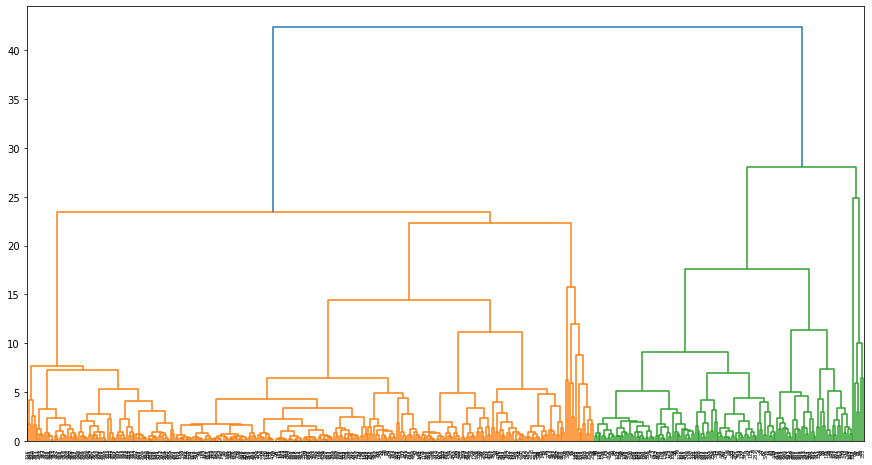

In [13]:
plt.figure(figsize=(15,8))
sch.dendrogram(sch.linkage(scaled_data,"ward"))
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
model=AgglomerativeClustering(n_clusters=2)
df['groups'] = model.fit_predict(scaled_data)

In [16]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,groups
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [17]:
from sklearn.decomposition import PCA

In [18]:
scaled_data.shape

(440, 8)

In [19]:
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)
reduced_data.shape

(440, 3)

In [20]:
import plotly.express as px

In [21]:
px.scatter_3d(x=reduced_data[:,0],y=reduced_data[:,1],z=reduced_data[:,2])